## Results 

In [4]:
import os
import pandas as pd
import json
from src.result_analysis import create_precision_recall_plot, create_precision_plot
pd.set_option('display.max_colwidth', None)


def make_sorted_labels(precision_table):
    return [elem(str) for elem in sorted(list([int(e) for e in precision_table[0].keys()]))]


def make_precision_table(experiments, levels=[1,5], prefix='', round_signs=3):
    if prefix!='':
        prefix = prefix+'_'
    precision_table = []
    exp_names = []
    for exp_path in experiments:
        if type(exp_path) is tuple:
            exp_path, exp_name = exp_path
        else:
            exp_name = exp_path.split('/')[-1]
        
        exp_names.append(exp_name)
        try:
            with open(os.path.join(exp_path, f'{prefix}precision.json')) as f:
                precision_dict = json.load(f)
        except Exception as ex:
            continue
        row = {"model": exp_name}
        row1 = {level : round(prec, round_signs) for level, prec in precision_dict['precisions_at_level'].items()}
        for k,v in row1.items():
            row[k] = v
            
        if levels is None:
            levels = [str(lev) for lev in sorted([int(e) for e in precision_dict['precisions_at_level'].keys()])]
        else:
            levels = [str(lev) for lev in levels]

            row['MAP'] = round(precision_dict['map'], round_signs)
        
        precision_table.append(row)
    
    return pd.DataFrame(precision_table)[['model']+ levels + ['MAP']]


def create_multiple_curves(experiments, score_file_name):
    curves = {}
    for exp in experiments:
        if type(exp) is tuple:
            exp, exp_name = exp
        else:
            exp_name = exp.split('/')[-1]
        curve = pd.read_csv(os.path.join(exp, score_file_name))
        curves[exp_name] = curve
    return curves


def create_multiple_precision_recall_curves(experiments):
    return create_multiple_curves(experiments, 'precision_recall.csv')


def create_multiple_precision_curves(experiments):
    return create_multiple_curves(experiments, 'precs_all_hard.csv')

### Evaluate

In [ ]:
import src
!python -m src.run_evaluate \
--results_path=workdir/results/test-paper_roles_st_stopword\
--exp_names=melamud_add,melamud_baladd,melamud_mult,melamud_balmult\
# --k=10
# melamud_add,melamud_baladd,melamud_mult,melamud_balmult

In [2]:
import src
!python -m src.run_evaluate \
--results_path=workdir/upperbound_results/paper_nouns_st
# --exp_names=gie_swn_test_semiPURExlnet_embs_swnhypers+dt_59g_lem+melamud_add

paper_roles_st  ########################
[Errno 2] No such file or directory: 'workdir/upperbound_results/paper_roles_st/tps.pkl'
paper_preds_set  ########################
[Errno 2] No such file or directory: 'workdir/upperbound_results/paper_preds_set/tps.pkl'
paper_nouns_st  ########################
77091
100%|█████████████████████████████████| 77091/77091 [00:00<00:00, 202543.25it/s]
Precision at levels:
(1, 1.0)
(5, 0.9043078958633304)
(10, 0.7958737076960994)
MAP:  1.0
################################


In [99]:
#delete mcs-, max- files from test-paper_preds_st_pattern
main_res = 'results'
# main_res = results_embs_mymodifiedrun

# res_dir = 'test-paper_preds_st_pattern_vocabfilter'
# final_exps = 'fasttext_cc_nolem,glove_840B_nolem,dt_wiki_lem,dt_59g_lem,melamud_baladd,blc-ntok1-nunits1-nomask-k200,gie_swv_test_semiPURExlnet,gie_swv_test_semiPURExlnet_embs,gie_swv_test_semiPURExlnet_embs_swvhypers'
final_exps_modified = 'gie_swv_test_semiPUREBert_embs'

# res_dir = 'test-paper_nouns_st_pattern_stopwords_nounfilter'
# final_exps = 'fasttext_cc_nolem,glove_840B_nolem,melamud_baladd,blc-ntok1-nunits1-nomask-k200,gie_swn_test_semiPURExlnet,gie_swn_test_semiPURExlnet_embs,gie_swn_test_semiPURExlnet_embs_swnhypers'
final_exps_modified = 'gie_swn_test_semiPUREBert_embs'

# res_dir = 'test-paper_roles_st_pattern'
# final_exps = 'fasttext_cc_nolem,glove_840B_nolem,dt_59g_lem,dt_wiki_lem,gie_swr_test_semiPURExlnet,gie_swr_test_semiPURExlnet_embs,gie_swr_test_semiPURExlnet_embs_swrhypers'
final_exps_modified = 'gie_swr_test_semiPUREBert_embs'





# res_dir = 'test-paper_preds_st_merged'
# final_exps = 'melamud_baladd+gie_swv_test_semiPURExlnet+dt_59g_lem'

# res_dir = 'test-paper_nouns_st_merged'
# final_exps = 'gie_swn_test_semiPURExlnet_embs_swnhypers+dt_59g_lem+melamud_baladd'

res_dir = 'test-paper_roles_st_merged'
final_exps = 'gie_swr_test_semiPURExlnet_embs_swrhypers+dt_wiki_lem+melamud_baladd'


In [100]:
import src
!python -m src.run_evaluate \
--results_path=workdir/$main_res/$res_dir\
--k=50\
--min_cluster_size=5\
--prefix='mcs-5'\
--exp_names=$final_exps


gie_swr_test_semiPURExlnet_embs_swrhypers+dt_wiki_lem+melamud_baladd  ########################
170823
100%|███████████████████████████████| 170823/170823 [00:01<00:00, 146597.93it/s]
Precision at levels:
(1, 0.5573898128472161)
(5, 0.479519736803592)
(10, 0.39698928130286903)
MAP:  0.15579986608052976
################################


In [101]:
import src
!python -m src.run_evaluate \
--results_path=workdir/$main_res/$res_dir\
--k=50\
--min_cluster_size=10\
--prefix='mcs-10'\
--exp_names=$final_exps


gie_swr_test_semiPURExlnet_embs_swrhypers+dt_wiki_lem+melamud_baladd  ########################
158096
100%|███████████████████████████████| 158096/158096 [00:00<00:00, 169086.30it/s]
Precision at levels:
(1, 0.5741764497520494)
(5, 0.49869952433964176)
(10, 0.4149896265560166)
MAP:  0.1524652065564694
################################


In [102]:
import src
!python -m src.run_evaluate \
--results_path=workdir/$main_res/$res_dir\
--k=50\
--min_cluster_size=15\
--prefix='mcs-15'\
--exp_names=$final_exps


gie_swr_test_semiPURExlnet_embs_swrhypers+dt_wiki_lem+melamud_baladd  ########################
145329
100%|███████████████████████████████| 145329/145329 [00:00<00:00, 162662.64it/s]
Precision at levels:
(1, 0.589373077637636)
(5, 0.5160566714145146)
(10, 0.4315263987228977)
MAP:  0.15181580698532204
################################


In [103]:
import src
!python -m src.run_evaluate \
--results_path=workdir/$main_res/$res_dir\
--k=50\
--max_cluster_size=15\
--prefix='max-15'\
--exp_names=$final_exps


gie_swr_test_semiPURExlnet_embs_swrhypers+dt_wiki_lem+melamud_baladd  ########################
38709
100%|█████████████████████████████████| 38709/38709 [00:00<00:00, 214187.19it/s]
Precision at levels:
(1, 0.3300782763698365)
(5, 0.23390942674830142)
(10, 0.171944509028908)
MAP:  0.17570831118853203
################################


# Tables

## Upperbound

In [7]:
result_dir = 'workdir/upperbound_results'
experiments = [
    (f'{result_dir}/paper_roles_st/', 'LexicalUnit-Verbs'),
    (f'{result_dir}/paper_nouns_st/', 'LexicalUnit-Nouns'),
    (f'{result_dir}/paper_preds_st/', 'SemanticRoles')
]

result_table = make_precision_table(experiments, levels=[1,5])
result_table=result_table.set_index("model")
result_table

,1,5,MAP
model,,,
LexicalUnit-Verbs,1.0,0.971,1.000
LexicalUnit-Nouns,1.0,0.919,1.005
SemanticRoles,1.0,0.904,1.000


In [8]:
result_table.to_latex()

'\\begin{tabular}{lrrr}\n\\toprule\n{} &    1 &      5 &    MAP \\\\\nmodel             &      &        &        \\\\\n\\midrule\nLexicalUnit-Verbs &  1.0 &  0.971 &  1.000 \\\\\nLexicalUnit-Nouns &  1.0 &  0.919 &  1.005 \\\\\nSemanticRoles     &  1.0 &  0.904 &  1.000 \\\\\n\\bottomrule\n\\end{tabular}\n'

### Lexical units

In [ ]:
!ls workdir/results

In [106]:
result_dir = 'workdir/results'
sub_dir = 'test-paper_preds_st_pattern_vocabfilter'
# sub_dir = 'test-paper_preds_st_lemminflect_vocabfilter'
# sub_dir = 'test-paper_preds_st_lemminflect_verbfilter'
# sub_dir = 'test-paper_preds_st'
prefix = 'mcs-5'
experiments = [

    (f'{result_dir}/{sub_dir}/glove_840B_nolem/', 'GloVe'),
    (f'{result_dir}/{sub_dir}/fasttext_cc_nolem/', 'fastText'),
    (f'{result_dir}/{sub_dir}/word2vec_googlenews_nolem/', 'word2vec'),
    
    (f'{result_dir}/{sub_dir}/dt_wiki_lem', 'DT wiki'),
    (f'{result_dir}/{sub_dir}/dt_59g_lem', 'DT 59g'),

    
    (f'{result_dir}/{sub_dir}/melamud_add', 'Melamud add'),
    (f'{result_dir}/{sub_dir}/melamud_baladd', 'Melamud balAdd'),
    (f'{result_dir}/{sub_dir}/melamud_mult', 'Melamud mult'),
    (f'{result_dir}/{sub_dir}/melamud_balmult', 'Melamud balMult'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200', 'BERT large cased with mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o mask'),
         (f'{result_dir}/{sub_dir}/gie_swv_test_semiPURExlnet', 'XLNet'),

#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with mask'),
#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-nomask-k200', 'BERT base cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o mask'),
        
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tand', 'BERT large cased Tand w/o mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased TandT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandT', 'BERT large cased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large cased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large cased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandthenT', 'BERT large cased TandthenT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tand', 'BERT large uncased Tand w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandT', 'BERT large uncased TandT w/o mask'),
    #     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandT', 'BERT large uncased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large uncased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large uncased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandthenT', 'BERT large uncased TandthenT w mask'),
    (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),

#      (f'{result_dir}/{sub_dir}/gie_swv_test_semiPURExlnet', 'XLNet'),

#     (f'{result_dir}/{sub_dir}/gie_swv_test_PUREbert', 'BERT'),
#     (f'{result_dir}/{sub_dir}/gie_swv_test_PUREbert_embs', 'BERT+embs (default)'),
    (f'{result_dir}/{sub_dir}/gie_swv_test_semiPURExlnet_embs', 'XLNet+embs (default)'),
    
    (f'{result_dir}/{sub_dir}/gie_swv_test_semiPURExlnet_embs_swvhypers', 'XLNet+embs (optimal)'),

#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert_original', 'BERT original '),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert', 'BERT myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert_andpre', 'BERT andpre myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert_andthenpre', 'BERT andthenpre myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet', 'XLNet myrun)'),
#         (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet_embs_swvhypers', 'XLNet+embs (optimal) myrun)'),

#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet_nopreprocessor', 'XLNet nopreprocessor myrun)'),
#      (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet_mask', 'XLNet mask myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet_base', 'XLNet base myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swv_test_semiPUREXlnet_base_mask', 'XLNet base mask myrun'),

]

result_table = make_precision_table(experiments, prefix=prefix)
result_table=result_table.set_index("model")
result_table

,1,5,MAP
model,,,
GloVe,0.409,0.290,0.121
fastText,0.423,0.323,0.146
DT wiki,0.339,0.238,0.096
DT 59g,0.384,0.292,0.134
Melamud balAdd,0.423,0.319,0.144
BERT large cased w/o mask,0.414,0.297,0.119
XLNet,0.381,0.295,0.124
XLNet+embs (default),0.515,0.374,0.166
XLNet+embs (optimal),0.530,0.390,0.175


In [ ]:
# print(result_table.to_latex())

### Nouns

In [ ]:
result_dir = 'workdir/results'
sub_dir = 'test-paper_nouns_st_pattern'
sub_dir = 'test-paper_nouns_st_pattern_stopwords'
sub_dir = 'test-paper_nouns_st_pattern_stopwords_nounfilter'
# sub_dir = 'test-paper_nouns_st_lemminflect'
# sub_dir = 'test-paper_nouns_st_lemminflect_stopwords'
sub_dir = 'test-paper_nouns_st_lemminflect_stopwords_nounfilter'
experiments = [

    (f'{result_dir}/{sub_dir}/glove_840B_nolem/', 'GloVe'),
    (f'{result_dir}/{sub_dir}/fasttext_cc_nolem/', 'fastText'),
    (f'{result_dir}/{sub_dir}/word2vec_googlenews_nolem/', 'word2vec'),
    
    (f'{result_dir}/{sub_dir}/dt_wiki_lem', 'DT wiki'),
    (f'{result_dir}/{sub_dir}/dt_59g_lem', 'DT 59g'),

    
    (f'{result_dir}/{sub_dir}/melamud_add', 'Melamud add'),
    (f'{result_dir}/{sub_dir}/melamud_baladd', 'Melamud balAdd'),
    (f'{result_dir}/{sub_dir}/melamud_mult', 'Melamud mult'),
    (f'{result_dir}/{sub_dir}/melamud_balmult', 'Melamud balMult'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200', 'BERT large cased with mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o mask'),
        (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet', 'XLNet'),

#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with mask'),
#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-nomask-k200', 'BERT base cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o mask'),
        
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tand', 'BERT large cased Tand w/o mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased TandT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandT', 'BERT large cased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large cased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large cased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandthenT', 'BERT large cased TandthenT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tand', 'BERT large uncased Tand w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandT', 'BERT large uncased TandT w/o mask'),
    #     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandT', 'BERT large uncased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large uncased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large uncased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandthenT', 'BERT large uncased TandthenT w mask'),

    (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),

#     (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet', 'XLNet'),
    (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet_embs', 'XLNet+embs (default)'),
    (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet_embs_swnhypers', 'XLNet+embs (optimal)'),
#     (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet_embs_swvhypers', 'XLNet+embs (optimal v)'),
#     (f'{result_dir}/{sub_dir}/gie_swn_test_semiPURExlnet_embs_swrhypers', 'XLNet+embs (optimalh r)'),
    
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert_original', 'BERT original'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert', 'BERT myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert_andpre', 'BERT andpre myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert_andthenpre', 'BERT andthenpre myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREXlnet', 'XLNet myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREXlnet_nopreprocessor', 'XLNet nopreprocessor myrun'),
#      (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREXlnet_mask', 'XLNet mask myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREXlnet_base', 'XLNet base myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swn_test_semiPUREXlnet_base_mask', 'XLNet base mask myrun'),

]

 
print(sub_dir)
result_table = make_precision_table(experiments)
result_table=result_table.set_index("model")
result_table

In [ ]:
# print(result_table.to_latex())

### Roles

In [2]:
result_dir = 'workdir/results'
sub_dir = 'paper_roles_st'
sub_dir = 'test-paper_roles_st_pattern'
# sub_dir = 'test-paper_roles_st_pattern_stopword3'
# sub_dir = 'test-paper_roles_st_pattern_stopwords4'
# sub_dir = 'test-paper_roles_st_pattern_stopword5'
# sub_dir = 'test-paper_roles_st_pattern_stopword6'
# sub_dir = 'test-paper_roles_st_lemminflect'
# sub_dir = 'test-paper_roles_st_lemminflect_stopword3'
# sub_dir = 'test-paper_roles_st_lemminflect_stopwords4'
# sub_dir = 'test-paper_roles_st_lemminflect_stopword5'
# sub_dir = 'test-paper_roles_st_lemminflect_stopword6'

# sub_dir = 'test-paper_roles_st'

experiments = [

    (f'{result_dir}/{sub_dir}/glove_840B_nolem/', 'GloVe'),
    (f'{result_dir}/{sub_dir}/fasttext_cc_nolem/', 'fastText'),
    (f'{result_dir}/{sub_dir}/word2vec_googlenews_nolem/', 'word2vec'),
    
    (f'{result_dir}/{sub_dir}/dt_wiki_lem', 'DT wiki'),
    (f'{result_dir}/{sub_dir}/dt_59g_lem', 'DT 59g'),

    
    (f'{result_dir}/{sub_dir}/melamud_add', 'Melamud add'),
    (f'{result_dir}/{sub_dir}/melamud_baladd', 'Melamud balAdd'),
    (f'{result_dir}/{sub_dir}/melamud_mult', 'Melamud mult'),
    (f'{result_dir}/{sub_dir}/melamud_balmult', 'Melamud balMult'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200', 'BERT large cased with mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o mask'),
         (f'{result_dir}/{sub_dir}/gie_swr_test_semiPURExlnet', 'XLNet'),

#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with mask'),
#     (f'{result_dir}/{sub_dir}/bbc-ntok1-nunits1-nomask-k200', 'BERT base cased w/o mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with mask'),
#     (f'{result_dir}/{sub_dir}/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o mask'),
        
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tand', 'BERT large cased Tand w/o mask'),
    (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased TandT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandT', 'BERT large cased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large cased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large cased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blc-ntok1-nunits1-mask-k200-TandthenT', 'BERT large cased TandthenT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tand', 'BERT large uncased Tand w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandT', 'BERT large uncased TandT w/o mask'),
    #     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandT', 'BERT large uncased TandT w mask'),

#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large uncased Tandthen w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large uncased TandthenT w/o mask'),
#     (f'{result_dir}/{sub_dir}/blu-ntok1-nunits1-mask-k200-TandthenT', 'BERT large uncased TandthenT w mask'),

#      (f'{result_dir}/{sub_dir}/gie_swr_test_semiPURExlnet', 'XLNet'),
    (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),

#     (f'{result_dir}/{sub_dir}/gie_swr_test_PUREbert', 'BERT'),
    (f'{result_dir}/{sub_dir}/gie_swr_test_PUREbert_embs', 'BERT+embs (default)'),
    (f'{result_dir}/{sub_dir}/gie_swr_test_semiPURExlnet_embs', 'XLNet+embs (default)'),
    (f'{result_dir}/{sub_dir}/gie_swr_test_semiPURExlnet_embs_swrhypers', ' XLNet+embs (optimal)'),

#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREBert_original', 'BERT original '),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREBert', 'BERT myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREBert_embs', 'BERT+embs (default) myrun)'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREXlnet', 'XLNet myrun)'),

#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREXlnet_mask', 'XLNet mask myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREXlnet_base', 'XLNet base myrun'),
#     (f'workdir/results_embs_mymodifiedrun/{sub_dir}/gie_swr_test_semiPUREXlnet_base_mask', 'XLNet base mask myrun'),

]

result_table = make_precision_table(experiments)
result_table=result_table.set_index("model")
result_table

,1,5,MAP
model,,,
GloVe,0.303,0.251,0.070
fastText,0.184,0.135,0.029
word2vec,0.319,0.223,0.052
DT wiki,0.368,0.283,0.091
DT 59g,0.350,0.275,0.087
Melamud add,0.369,0.278,0.070
Melamud balAdd,0.378,0.284,0.072
Melamud mult,0.355,0.265,0.066
Melamud balMult,0.375,0.277,0.070


In [ ]:
# print(result_table2.to_latex())

## Merged models

### simplyfy names for merged models

In [82]:
def pretify(x):
    
    x = x.replace("gie_swv_test_semiPURExlnet_embs_swvhypers", "XLNet embs")
    x = x.replace("gie_swr_test_semiPURExlnet_embs_swrhypers", "XLNet embs")
    x = x.replace("gie_swn_test_semiPURExlnet_embs_swnhypers", "XLNet embs")

    x = x.replace("gie_swv_test_semiPURExlnet", "XLNet")
    x = x.replace("gie_swr_test_semiPURExlnet", "XLNet")
    x = x.replace("gie_swn_test_semiPURExlnet", "XLNet")

    x = x.replace("-ntok1-nunits1-nomask-k200", "")
    x = x.replace("-ntok1-nunits1-mask-k200", "")

    x = x.replace("blc", "BERT")
    x = x.replace("-TandT", " [TandT]")
    x = x.replace("glove_840B_nolem", "nc-emb")
    x = x.replace("fasttext_cc_nolem", "nc-emb")
    x = x.replace("dt_59g_lem", "DT")
    x = x.replace("dt_wiki_lem", "DT")
    x = x.replace("melamud_baladd", "Melamud balAdd")
    x = x.strip()
    
    order = {"XLNet embs": 0,
             "XLNet": 1,
            "BERT [TandT]":2,
            "BERT":3,
            "Melamud balAdd":4,
             "nc-emb" : 5,
             "DT":6
            }
    
    x = x.split("+")
#     print(x)
    o = [(t, order[t]) for t in x]
    o = sorted(o, key=lambda x:x[1])
    x = [t[0] for t in o]
#     print(x)
    x = " + ".join(x)

    return x


In [81]:
print_order = """nc-emb + DT                                 
Melamud balAdd + DT                      
Melamud balAdd + nc-emb                     
XLNet + nc-emb                              
XLNet + DT                               
XLNet + Melamud balAdd                   
XLNet+embs + nc-emb                         
XLNet+embs + DT                          
XLNet+embs + Melamud balAdd              
Melamud balAdd + nc-emb + DT                
XLNet + nc-emb + DT                         
XLNet + Melamud balAdd + nc-emb             
XLNet + Melamud balAdd + DT             
XLNet+embs + nc-emb + DT                    
XLNet+embs + Melamud balAdd + DT""".split("\n")
print_order = [l.strip().replace('+embs', ' embs') for l in print_order]
print_order

['nc-emb + DT',
 'Melamud balAdd + DT',
 'Melamud balAdd + nc-emb',
 'XLNet + nc-emb',
 'XLNet + DT',
 'XLNet + Melamud balAdd',
 'XLNet embs + nc-emb',
 'XLNet embs + DT',
 'XLNet embs + Melamud balAdd',
 'Melamud balAdd + nc-emb + DT',
 'XLNet + nc-emb + DT',
 'XLNet + Melamud balAdd + nc-emb',
 'XLNet + Melamud balAdd + DT',
 'XLNet embs + nc-emb + DT',
 'XLNet embs + Melamud balAdd + DT']

### Lexical unit

In [ ]:
!ls workdir/results

In [87]:
path = "workdir/results/test-paper_preds_st_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]

experiments.sort()
result_table = make_precision_table(experiments)
result_table['model']=result_table['model'].apply(lambda x:pretify(x))

result_table = result_table.loc[result_table['model'].apply(lambda x: not 'BERT' in x)]
result_table['order'] = result_table['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table= result_table.sort_values(by='order', ascending=True).reset_index(drop=True)

result_table=result_table.set_index("model")
result_table

,1,5,MAP,order
model,,,,
nc-emb + DT,0.435,0.313,0.179,0
Melamud balAdd + DT,0.452,0.325,0.184,1
Melamud balAdd + nc-emb,0.440,0.323,0.184,2
XLNet + nc-emb,0.472,0.321,0.179,3
XLNet + DT,0.461,0.312,0.163,4
XLNet + Melamud balAdd,0.476,0.326,0.182,5
XLNet embs + nc-emb,0.486,0.331,0.187,6
XLNet embs + DT,0.491,0.332,0.180,7
XLNet embs + Melamud balAdd,0.494,0.338,0.191,8


In [ ]:

path = "workdir/results/test-paper_preds_st_lemminflect_verbfilter_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]

experiments.sort()
result_table = make_precision_table(experiments)
result_table['model']=result_table['model'].apply(lambda x:pretify(x))
result_table = result_table.loc[result_table['model'].apply(lambda x: not 'BERT' in x)]
result_table['order'] = result_table['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table= result_table.sort_values(by='order', ascending=True).reset_index(drop=True)

result_table=result_table.set_index("model")
result_table

### Nouns

In [ ]:
path = "workdir/results/test-paper_nouns_st_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]

experiments.sort()
result_table = make_precision_table(experiments)
result_table['model']=result_table['model'].apply(lambda x:pretify(x))

result_table = result_table.loc[result_table['model'].apply(lambda x: not 'BERT' in x)]
result_table['order'] = result_table['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table= result_table.sort_values(by='order', ascending=True).reset_index(drop=True)


result_table=result_table.set_index("model")
result_table

In [ ]:

path = "workdir/results/test-paper_nouns_st_lemminflect_stopwords_nounfilter_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]

experiments.sort()
result_table = make_precision_table(experiments)
result_table['model']=result_table['model'].apply(lambda x:pretify(x))

result_table = result_table.loc[result_table['model'].apply(lambda x: not 'BERT' in x)]
result_table['order'] = result_table['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table= result_table.sort_values(by='order', ascending=True).reset_index(drop=True)

# result_table= result_table.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table=result_table.set_index("model")
result_table

In [ ]:
print(result_table.to_latex())

### Roles

In [ ]:
path = "workdir/results/test-paper_roles_st_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "T" in exp]
experiments.sort()
result_table2 = make_precision_table(experiments)
result_table2['model']=result_table2['model'].apply(lambda x:pretify(x))

result_table2 = result_table2.loc[result_table2['model'].apply(lambda x: not 'BERT' in x)]
result_table2['order'] = result_table2['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table2= result_table2.sort_values(by='order', ascending=True).reset_index(drop=True)


result_table2=result_table2.set_index("model")
result_table2

In [ ]:


path = "workdir/results/test-paper_roles_st_lemminflect_merged"

experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "T" in exp]
experiments.sort()
result_table2 = make_precision_table(experiments)
result_table2['model']=result_table2['model'].apply(lambda x:pretify(x))

result_table2 = result_table2.loc[result_table2['model'].apply(lambda x: not 'BERT' in x)]
result_table2['order'] = result_table2['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table2= result_table2.sort_values(by='order', ascending=True).reset_index(drop=True)

# result_table2= result_table2.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table2=result_table2.set_index("model")
result_table2

In [ ]:
path = "workdir/results/test-paper_roles_st_pattern_stopwords4_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "T" in exp]
experiments.sort()
result_table2 = make_precision_table(experiments)
result_table2['model']=result_table2['model'].apply(lambda x:pretify(x))

result_table2 = result_table2.loc[result_table2['model'].apply(lambda x: not 'BERT' in x)]
result_table2['order'] = result_table2['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table2= result_table2.sort_values(by='order', ascending=True).reset_index(drop=True)


# result_table2= result_table2.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table2=result_table2.set_index("model")
result_table2

In [ ]:
path = "workdir/results/test-paper_roles_st_lemminflect_stopwords4_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "T" in exp]
experiments.sort()
result_table2 = make_precision_table(experiments)
result_table2['model']=result_table2['model'].apply(lambda x:pretify(x))

result_table2 = result_table2.loc[result_table2['model'].apply(lambda x: not 'BERT' in x)]
result_table2['order'] = result_table2['model'].apply(lambda x: print_order.index(x) if x in print_order else 100)

result_table2= result_table2.sort_values(by='order', ascending=True).reset_index(drop=True)

# result_table2= result_table2.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table2=result_table2.set_index("model")
result_table2

# Figures

In [ ]:
base_output_path = './workdir/plots/'

## Lexical units

In [ ]:
result_dir = 'workdir/results'
emb_results = 'workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers'
output_path = base_output_path + 'preds.png'

experiments = [
    (f'{result_dir}/test-paper_preds_st/fasttext_cc_nolem/', 'fastText', '#ffff00'),
    (f'{result_dir}/test-paper_preds_st/dt_59g_lem', 'DT 59g', 'black'),
    (f'{result_dir}/test-melamud_preds_st/melamud_baladd', 'Melamud balAdd', '#ff9900'),
    (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200', 'BERT', 'blue'),
#     (f'{emb_results}/gie_swv_test_semiPURExlnet', 'XLNet', '#DB7093'),
#     (f'{emb_results}/gie_swv_test_PUREbert_embs', 'BERT embs', '#660066'),
#     (f'{emb_results}/gie_swv_test_semiPURExlnet_embs', 'XLNet embs', 'red'),
    (f'{emb_results.replace("default", "optimal")}/gie_swv_test_semiPURExlnet_embs_swvhypers', 'optimal XLNet embs', '#00FF00')

]

# colors = ['#63B8FF',  'b',  '#DB7093', 'red', '#696969',  'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red', '#FF8C00']

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

curves = create_multiple_precision_recall_curves(experiments)
create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

In [7]:
def create_multiple_curves(experiments, score_file_name, prefixes=None):
    curves = {}
    
    for i, exp in enumerate(experiments):
        if type(exp) is tuple:
            exp, exp_name = exp
        else:
            exp_name = exp.split('/')[-1]
            
        if prefixes!=None:
            prefix = prefixes[i]+'_'
            if prefix=='_':
                prefix=''
        else:
            prefix=''
#         print(prefix)    
        curve = pd.read_csv(os.path.join(exp, prefix+score_file_name))
#         print(curve)
        curves[exp_name] = curve
    return curves

def create_multiple_precision_recall_curves(experiments, prefixes):
    return create_multiple_curves(experiments, 'precision_recall.csv', prefixes=prefixes)


def create_multiple_precision_curves(experiments, prefixes):
    return create_multiple_curves(experiments, 'precs_all_hard.csv', prefixes=prefixes)

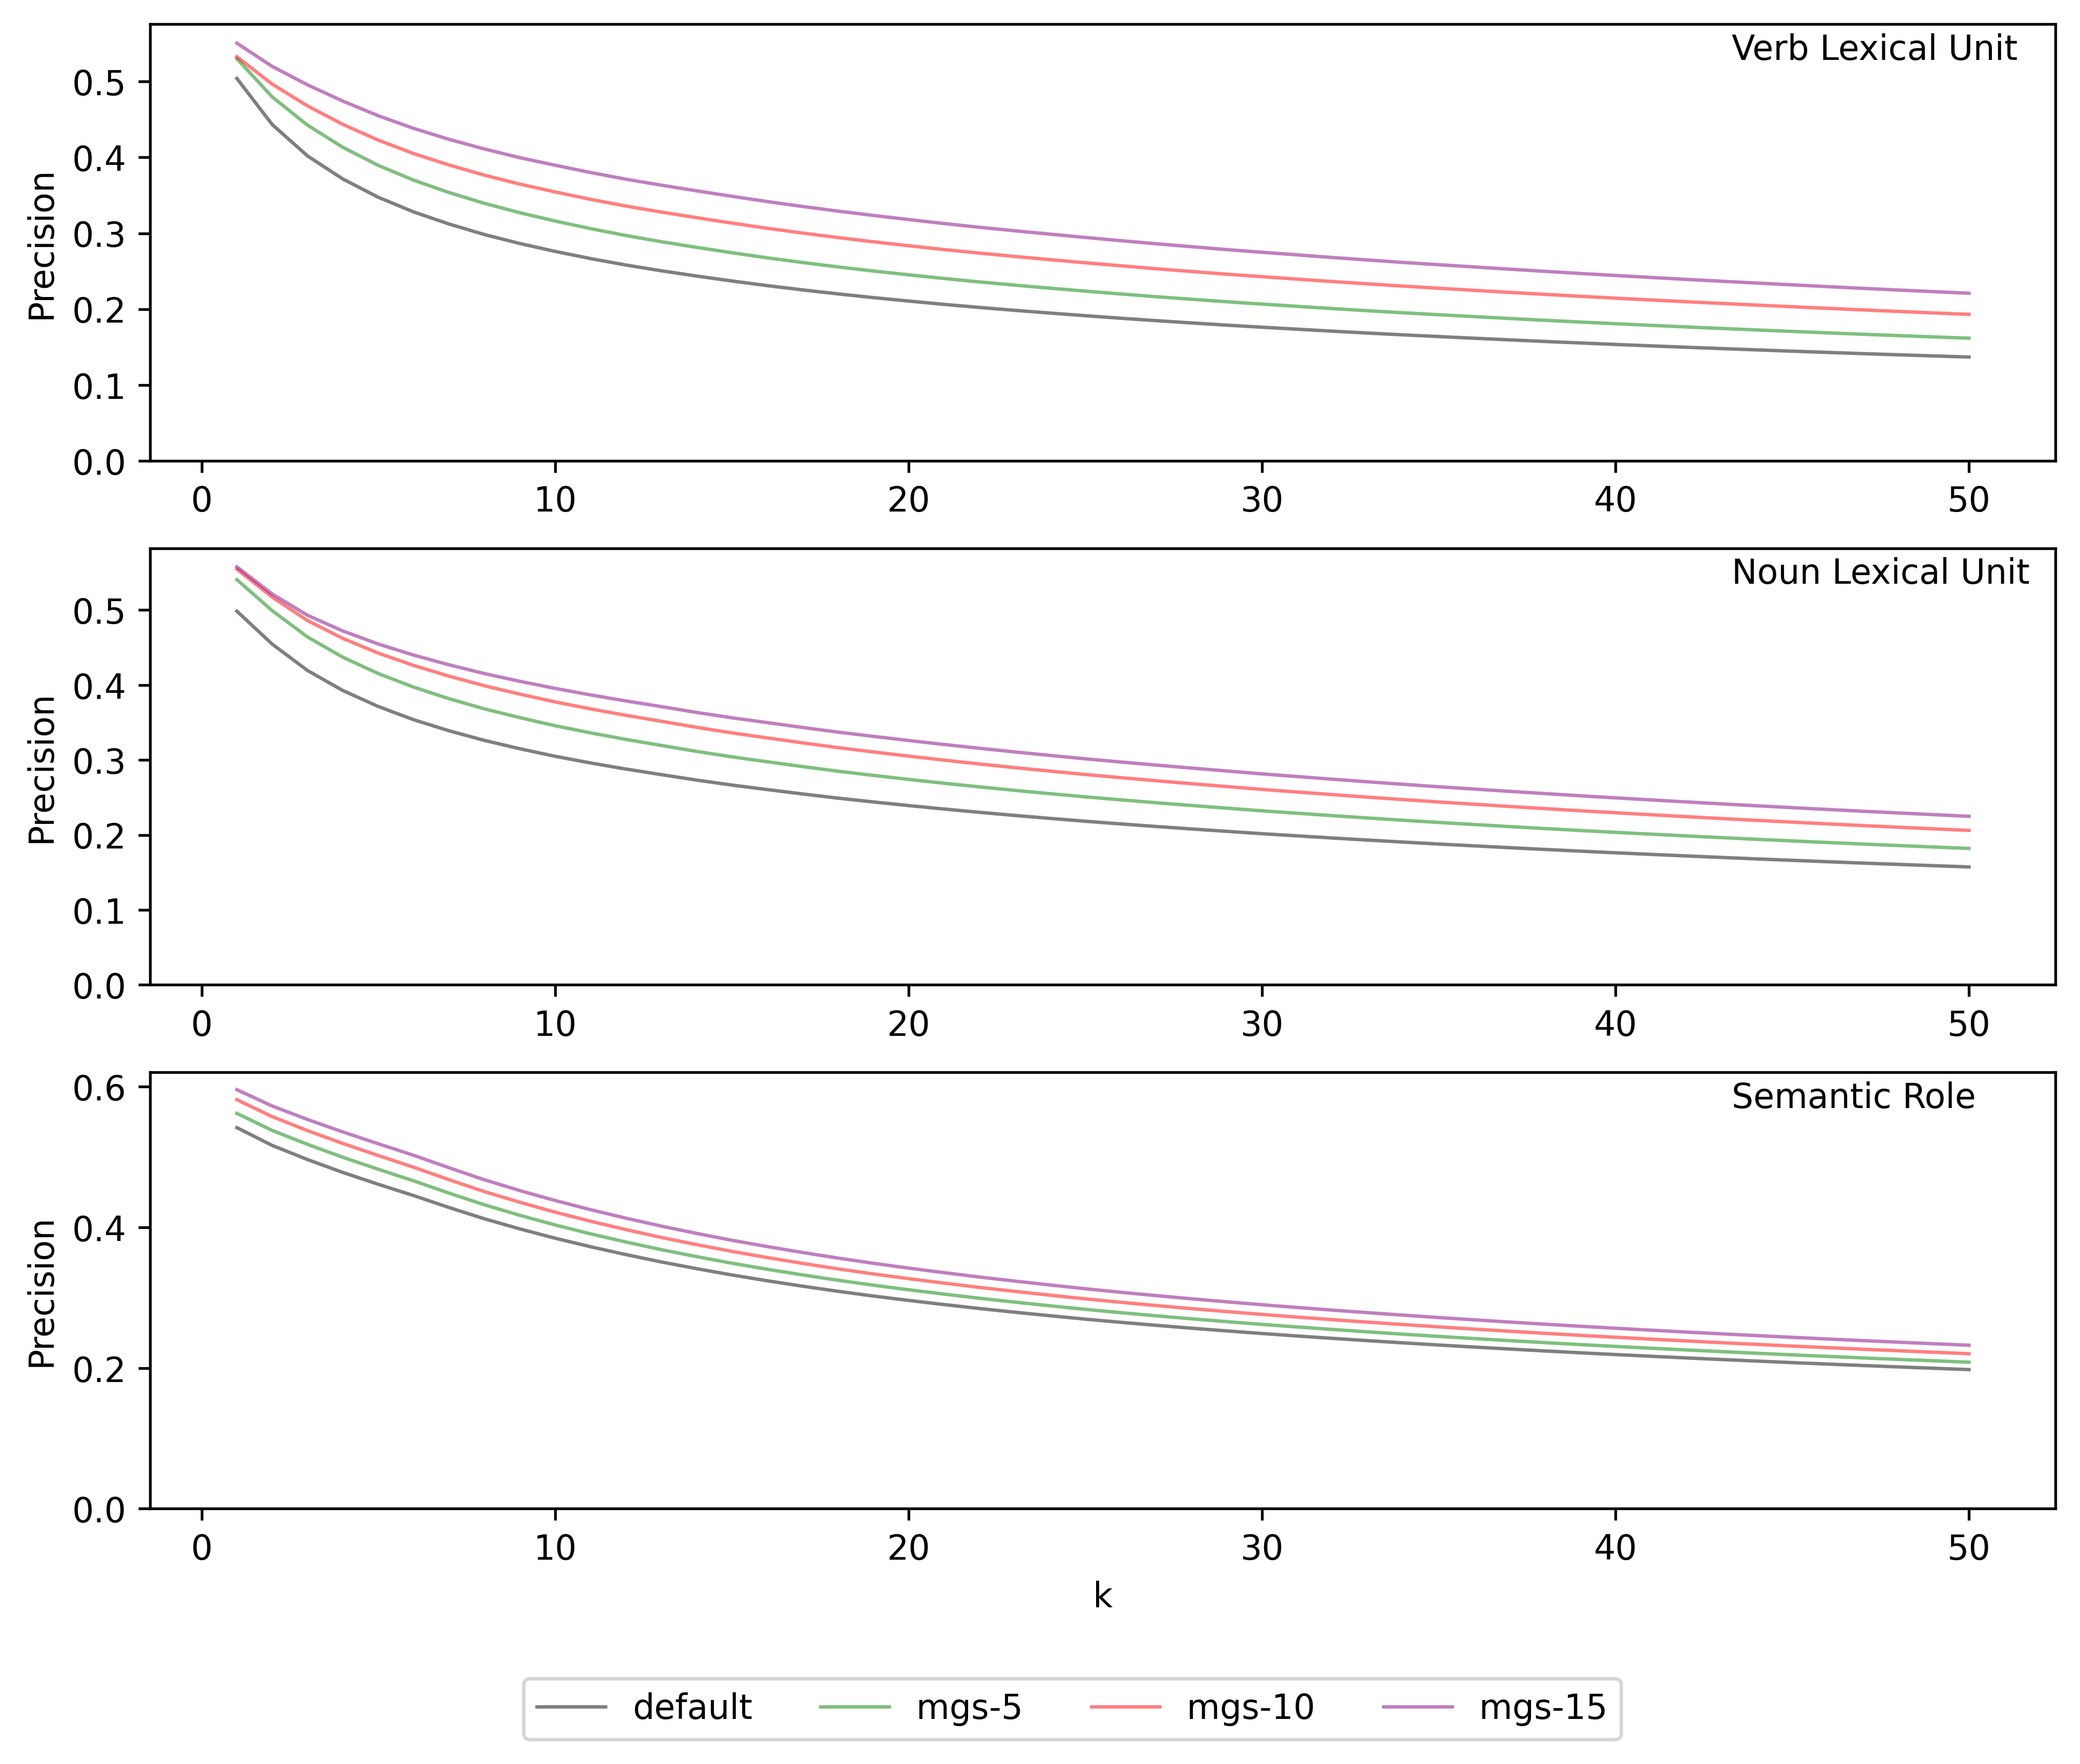

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from itertools import cycle
import numpy as np


#DEFAULT_COLORS = cycle(['b', 'r', 'g', 'y', 'black', 'brown', '#660066', 'orange'])
DEFAULT_COLORS = ['b', 'r', 'g', 'y', 'black', 'brown', '#660066', 'orange']


def create_precision_recall_plot(precision_recall_curves: Dict[str, pd.DataFrame], 
                                 colors=DEFAULT_COLORS, output_path=None, step=True):
    """ precision_recall_curves: {exp_name : pd.DataFrame([precision, recall])} """
    
    plt.figure(dpi=200, figsize=(6.4, 4.8), facecolor='w', edgecolor='k')
    
    max_y = -1
    max_x = -1
    for i, (exp_name, curve) in enumerate(precision_recall_curves.items()):
        #tps, aps, gps = load_tps_aps_gps(os.path.join(result_path, exp_name))
        data = pd.DataFrame({'precision' : curve.precision, 
                             'recall' : curve.recall})
        
        col = colors[i]
        marker = ''
        if type(col) is tuple:
            col, marker = col
        
        if step:
            graph = plt.step(data['recall'], data['precision'], color=col, 
                             marker=marker, alpha=0.5, where='post', linewidth=1.)
        else:
            graph = plt.plot(data['recall'], data['precision'], color=col, marker=marker, alpha=0.5, linewidth=1.)
            
        graph[0].set_label(exp_name)
            
        if data['recall'].max() > max_x:
            max_x = data['recall'].max()
        
        if data['precision'].max() > max_y:
            max_y = data['precision'].max()

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, max_y + 0.025])
    plt.xlim([0.0, max_x + 0.005])
    plt.legend(prop={'size': 9})
    
    if output_path is not None:
        plt.savefig(output_path)
    
    
def create_precision_plot(precision_curves: Dict[str, pd.DataFrame], 
                          colors=DEFAULT_COLORS, output_path=None, step=True):
    """ precision_recall_curves: {exp_name : pd.DataFrame([precision, recall])} """
    
    plt.figure(dpi=200, figsize=(6.4, 4.8), facecolor='w', edgecolor='k')
    
    max_y = -1
    rng = 0
    for i, (exp_name, curve) in enumerate(precision_curves.items()):
        data = pd.DataFrame({'precision' : curve.precs_all_hard})
        
        col = colors[i]
        marker = ''
        if type(col) is tuple:
            col, marker = col
        
        rng = np.array(range(1, data.shape[0] + 1))
        if step:
            graph = plt.step(rng, data['precision'], color=col, 
                             marker=marker, alpha=0.5, where='post', linewidth=1.)
        else:
            graph = plt.plot(rng, data['precision'], 
                             color=col, marker=marker, alpha=0.5, linewidth=1.)
            
        graph[0].set_label(exp_name)
        
        if data['precision'].max() > max_y:
            max_y = data['precision'].max()

    plt.xlabel('k')
    plt.ylabel('Precision')
    plt.ylim([0.0, max_y + 0.025])
    plt.xlim([0.0, len(rng) + 1])
    plt.legend(prop={'size': 9})
    
    if output_path is not None:
        plt.savefig(output_path)
        
def create_precision_plots(precision_curves: Dict[str, pd.DataFrame], 
                           precision_curves2: Dict[str, pd.DataFrame], 
                           precision_curves3: Dict[str, pd.DataFrame],
                          colors=DEFAULT_COLORS, output_path=None, step=True):
    """ precision_recall_curves: {exp_name : pd.DataFrame([precision, recall])} """
    fig, axes = plt.subplots(3,1, 
                         dpi=480,
                         figsize=(10, 8))

#     plt.figure(dpi=200, figsize=(6.4, 4.8), facecolor='w', edgecolor='k')
    
    max_y = -1
    rng = 0
    for i, (exp_name, curve) in enumerate(precision_curves.items()):
        data = pd.DataFrame({'precision' : curve.precs_all_hard})
        
        col = colors[i]
        marker = ''
        if type(col) is tuple:
            col, marker = col
        
        rng = np.array(range(1, data.shape[0] + 1))
        if step:
            graph = axes[0].step(rng, data['precision'], color=col, 
                             marker=marker, alpha=0.5, where='post', linewidth=1.)
        else:
            graph = axes[0].plot(rng, data['precision'], 
                             color=col, marker=marker, alpha=0.5, linewidth=1.)
            
        graph[0].set_label(exp_name)
        
        if data['precision'].max() > max_y:
            max_y = data['precision'].max()

    axes[0].set_ylabel('Precision')
    axes[0].set_ylim([0.0, max_y + 0.025])
#     axes[0].xlim([0.0, len(rng) + 1])
#     axes[0].legend(prop={'size': 9})
    for i, (exp_name, curve) in enumerate(precision_curves2.items()):
        data = pd.DataFrame({'precision' : curve.precs_all_hard})
        
        col = colors[i]
        marker = ''
        if type(col) is tuple:
            col, marker = col
        
        rng = np.array(range(1, data.shape[0] + 1))
        if step:
            graph = axes[1].step(rng, data['precision'], color=col, 
                             marker=marker, alpha=0.5, where='post', linewidth=1.)
        else:
            graph = axes[1].plot(rng, data['precision'], 
                             color=col, marker=marker, alpha=0.5, linewidth=1.)
            
        graph[0].set_label(exp_name)
        
        if data['precision'].max() > max_y:
            max_y = data['precision'].max()    
            
    axes[1].set_ylabel('Precision')
    axes[1].set_ylim([0.0, max_y + 0.025])
    for i, (exp_name, curve) in enumerate(precision_curves3.items()):
        data = pd.DataFrame({'precision' : curve.precs_all_hard})
        
        col = colors[i]
        marker = ''
        if type(col) is tuple:
            col, marker = col
        
        rng = np.array(range(1, data.shape[0] + 1))
        if step:
            graph = axes[2].step(rng, data['precision'], color=col, 
                             marker=marker, alpha=0.5, where='post', linewidth=1.)
        else:
            graph = axes[2].plot(rng, data['precision'], 
                             color=col, marker=marker, alpha=0.5, linewidth=1.)
            
        graph[0].set_label(exp_name)
        
        if data['precision'].max() > max_y:
            max_y = data['precision'].max()
            
            
    axes[2].set_ylabel('Precision') 
    axes[2].set_xlabel('k')
    axes[2].set_ylim([0.0, max_y + 0.025])
#     axes[0].xlim([0.0, len(rng) + 1])
#     axes[0].legend(prop={'size': 9})
#     axes[1].legend(prop={'size': 9})
# font1 = {
# #                 'family': 'serif',
#                     'color':  colors[i],
#                     'weight': 'bold',
#                     'size': 7
#                     }
    axes[0].text(.83, .98, 'Verb Lexical Unit',
                 ha='left', va='top', 
                 transform = axes[0].transAxes)
    axes[1].text(.83, .98, 'Noun Lexical Unit',
                 ha='left', va='top', 
                 transform = axes[1].transAxes)
    
    axes[2].text(.83, .98, 'Semantic Role',
                 ha='left', va='top', 
                 transform = axes[2].transAxes)
    
#     axes[0].set_title(f'Verbs-Lexical Unit')
#     axes[1].set_title(f'Nouns-Lexical Unit')
#     axes[2].set_title(f'Frame Roles')

    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    plt.figlegend( lines, labels, loc = 'lower center', ncol=4, labelspacing=0. , bbox_to_anchor=(0.5, -0.001))

#     if output_path is not None:
#         plt.savefig(output_path)

create_precision_plots(curves1, curves2, curves3, output_path=output_path, colors=colors, step=False)


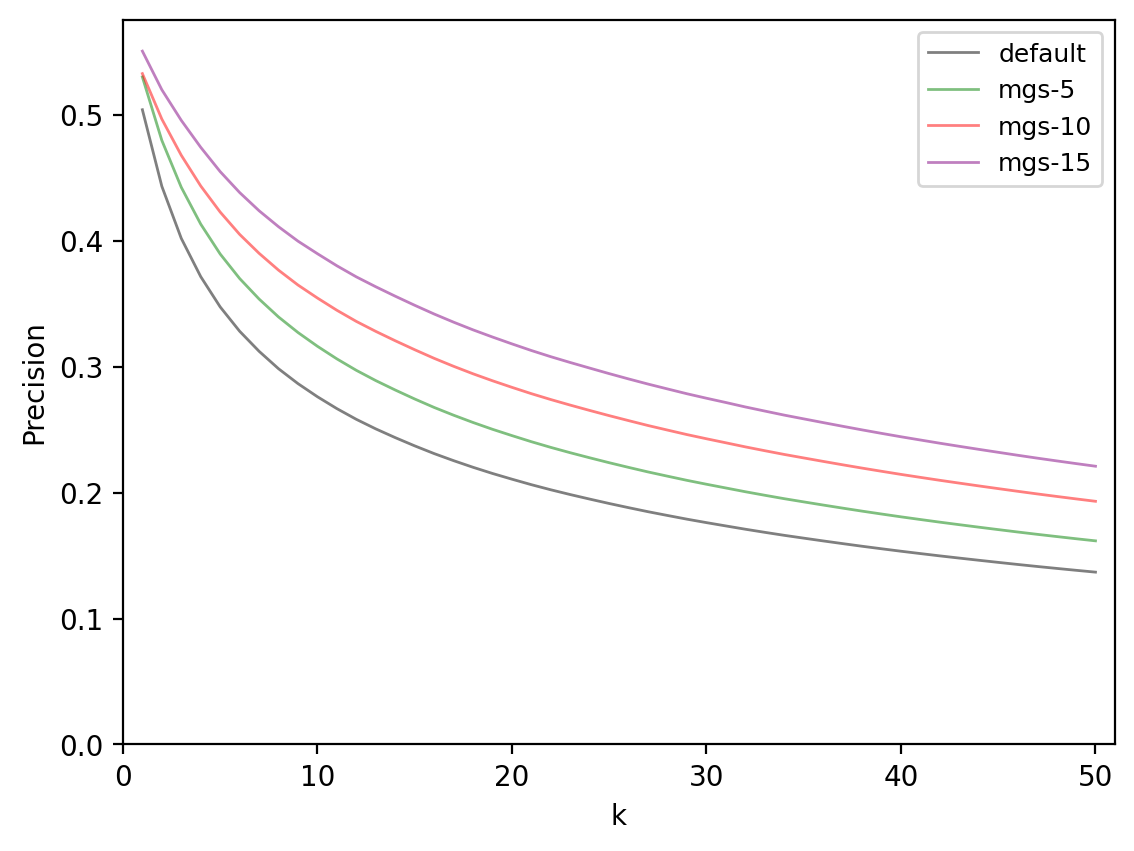

In [10]:
result_dir = 'workdir/results'
res_dir = 'test-paper_preds_st_pattern_vocabfilter'
output_path = result_dir + 'cluster_size_preds.png'

experiments = [
    (f'{result_dir}/{res_dir}/gie_swv_test_semiPURExlnet_embs_swvhypers/', 'default', '','black'),
    (f'{result_dir}/{res_dir}/gie_swv_test_semiPURExlnet_embs_swvhypers/', 'mgs-5', 'mcs-5','green'),
    (f'{result_dir}/{res_dir}/gie_swv_test_semiPURExlnet_embs_swvhypers/', 'mgs-10', 'mcs-10', 'red'),
    (f'{result_dir}/{res_dir}/gie_swv_test_semiPURExlnet_embs_swvhypers/', 'mgs-15', 'mcs-15', 'purple'),

]

# colors = ['#63B8FF',  'b',  '#DB7093', 'red', '#696969',  'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red', '#FF8C00']

colors = [exp[-1] for exp in experiments]
prefixes = [exp[-2] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

curves = create_multiple_precision_curves(experiments, prefixes=prefixes)
curves1 = create_multiple_precision_curves(experiments, prefixes=prefixes)
create_precision_plot(curves, output_path=output_path, colors=colors, step=False)


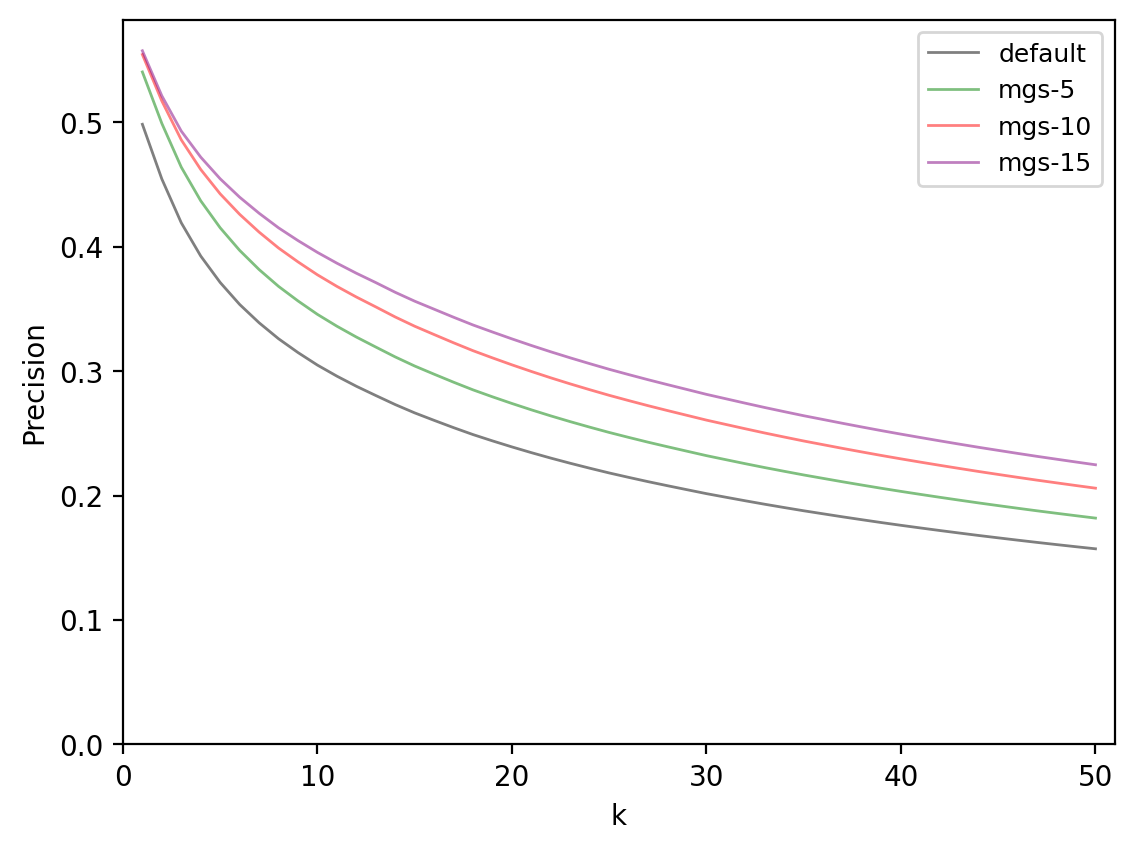

In [9]:
result_dir = 'workdir/results'
res_dir = 'test-paper_nouns_st_pattern_stopwords_nounfilter'
output_path = result_dir + 'cluster_size_preds.png'

experiments = [
    (f'{result_dir}/{res_dir}/gie_swn_test_semiPURExlnet_embs_swnhypers/', 'default', '','black'),
    (f'{result_dir}/{res_dir}/gie_swn_test_semiPURExlnet_embs_swnhypers/', 'mgs-5', 'mcs-5','green'),
    (f'{result_dir}/{res_dir}/gie_swn_test_semiPURExlnet_embs_swnhypers/', 'mgs-10', 'mcs-10', 'red'),
    (f'{result_dir}/{res_dir}/gie_swn_test_semiPURExlnet_embs_swnhypers/', 'mgs-15', 'mcs-15', 'purple'),

]

# colors = ['#63B8FF',  'b',  '#DB7093', 'red', '#696969',  'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red', '#FF8C00']

colors = [exp[-1] for exp in experiments]
prefixes = [exp[-2] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

# curves = create_multiple_precision_recall_curves(experiments, prefixes=prefixes)
# create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

curves = create_multiple_precision_curves(experiments, prefixes=prefixes)
curves2 = create_multiple_precision_curves(experiments, prefixes=prefixes)
create_precision_plot(curves, output_path=output_path, colors=colors, step=False)


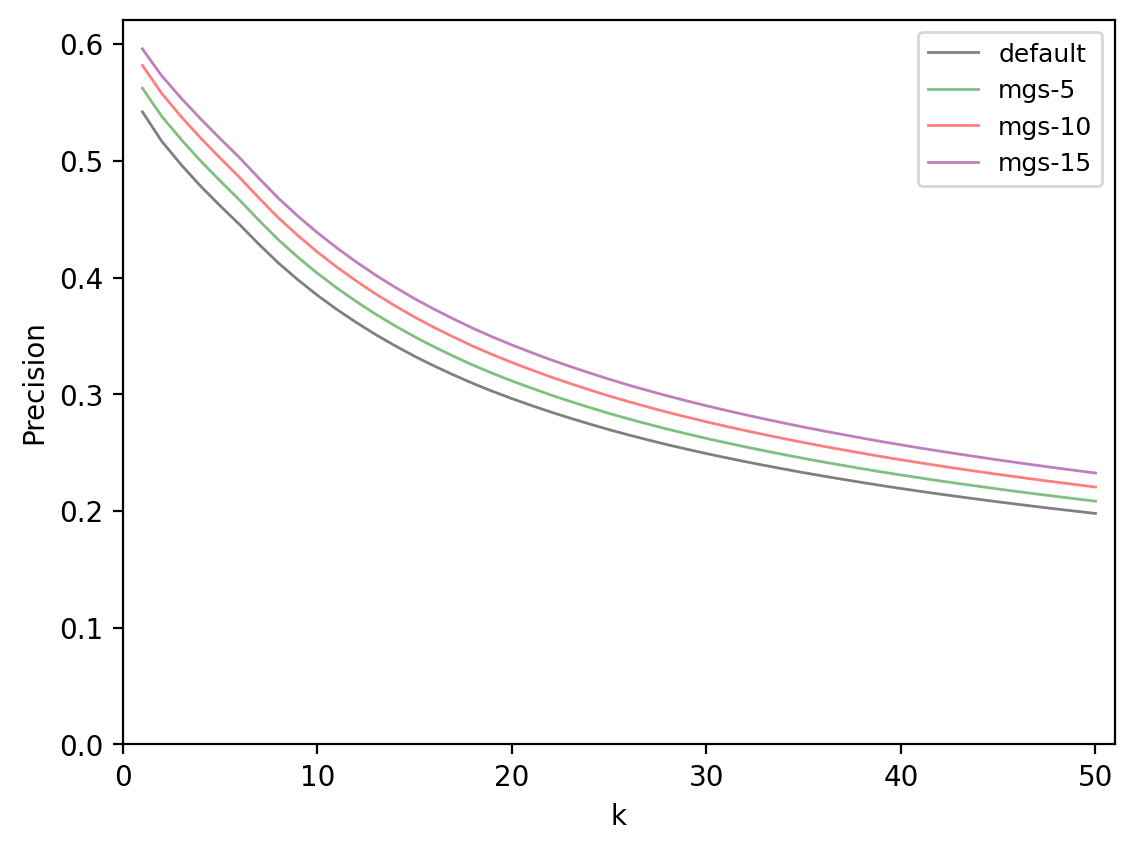

In [8]:
result_dir = 'workdir/results'
res_dir = 'test-paper_roles_st_pattern'
output_path = result_dir + 'cluster_size_preds.png'

experiments = [
    (f'{result_dir}/{res_dir}/gie_swr_test_semiPURExlnet_embs_swrhypers/', 'default', '','black'),
    (f'{result_dir}/{res_dir}/gie_swr_test_semiPURExlnet_embs_swrhypers/', 'mgs-5', 'mcs-5','green'),
    (f'{result_dir}/{res_dir}/gie_swr_test_semiPURExlnet_embs_swrhypers/', 'mgs-10', 'mcs-10', 'red'),
    (f'{result_dir}/{res_dir}/gie_swr_test_semiPURExlnet_embs_swrhypers/', 'mgs-15', 'mcs-15', 'purple'),

]

# colors = ['#63B8FF',  'b',  '#DB7093', 'red', '#696969',  'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red', '#FF8C00']

colors = [exp[-1] for exp in experiments]
prefixes = [exp[-2] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

# curves = create_multiple_precision_recall_curves(experiments, prefixes=prefixes)
# create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

curves = create_multiple_precision_curves(experiments, prefixes=prefixes)
curves3 = create_multiple_precision_curves(experiments, prefixes=prefixes)
create_precision_plot(curves, output_path=output_path, colors=colors, step=False)


# Roles

In [ ]:
output_path = base_output_path + 'roles.png'
emb_results = 'workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers'
output_path = base_output_path + 'preds_dsm.png'

experiments = [
    (f'{result_dir}/test-paper_roles_st/fasttext_cc_nolem/', 'fastText', '#ffff00'),
    (f'{result_dir}/test-paper_roles_st/dt_59g_lem', 'DT 59g', 'black'),
    (f'{result_dir}/test-melamud_roles_st/melamud_baladd', 'Melamud balAdd', '#ff9900'),
    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200', 'BERT', 'blue'),
    (f'{emb_results}/gie_swr_test_semiPURExlnet', 'XLNet', '#DB7093'),
    (f'{emb_results}/gie_swr_test_PUREbert_embs', 'BERT embs', '#660066'),
    (f'{emb_results}/gie_swr_test_semiPURExlnet_embs', 'XLNet embs', 'red'),
    (f'{emb_results.replace("default", "optimal")}/gie_swr_test_semiPURExlnet_embs_swrhypers', 'optimal XLNet embs', '#00FF00')

]



# colors = ['y',  'green',  '#FF8C00', '#afdafc', 'red',   'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red']

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

curves = create_multiple_precision_recall_curves(experiments)
create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)